
## Fitting a linear regression model with Keras

**Goal:** In this notebook you will see how to use Keras to fit the parameters (slope and intercept) of a simple linear regression model via gradient descent (GD). 

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. 

**Dataset:** You work again with the systolic blood pressure and age data of 33 American women, which is generated and visualized in the upper part of the notebook. 

**Content:**

* fit a linear model via the sklearn machine learning library of python to get the fitted values of the intercept and slope as reference. 

* use the keras library to fit the parameter of the simple linear model via GD with the objective to minimize the MSE loss. 
    * define a sequential keras model
    * define a loss and the optimizer
    * get a keras summary of the model
    * fit the model parameter via GD and check the current values of the estimated model parameters and the loss after each step  
    * verify that the estimated parameter values converge to the values which you got from the sklearn fit.  



[open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/nb_ch03_05.ipynb)


#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

Here we read in the systolic blood pressure and the age of the 33 American women in our dataset. Then we use the sklearn library to find the optimal values for the slope a and the intercept b.

In [2]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

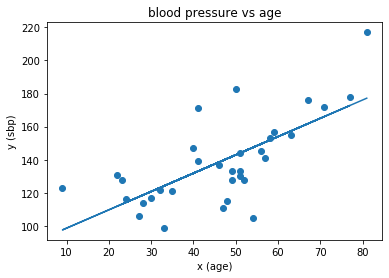

intercept =  87.67143 solpe =  1.1050216


In [3]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)


## Keras

Now we want to use the Keras library to find the optimal parameters for the linear regression problem. We load all the functions that we need to build a fully connected network with two inputs and one output and a linear activation function.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


Here we define our starting values for the slope a=0 and the intercept b=139 (139 is the mean of the blood pressure and slope a=0 implies that the model predicts the mean for each age). Then we build the model, we have 1 output and will use a linar activation function, for the optimization we want to use stochastic gradient descent and our loss is the mean squared error, just like in the notebooks before.

In [5]:
a=np.array(0,dtype="float32",ndmin=2)
b=np.array(139,dtype="float32",ndmin=1)

In [6]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.add(Activation('linear'))

opt = optimizers.SGD(lr=0.0004)

model.compile(loss='mean_squared_error',
              optimizer=opt)


W0818 00:26:31.046460 140480164738880 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 00:26:31.062788 140480164738880 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 00:26:31.066376 140480164738880 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 00:26:31.095066 140480164738880 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In the model summary we see that we have 2 trainable parameters, the slope a and the intercept b.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Let's set the trainable parameters to our starting values a=0 and b=139

In [8]:
model.set_weights([a,b])

W0818 00:26:37.502039 140480164738880 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 00:26:37.502898 140480164738880 deprecation_wrapper.py:119] From /root/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [9]:
a,b=model.get_weights()
print("slope=",a[0][0],"intercept=",b[0])

slope= 0.0 intercept= 139.0


If we do a forwad pass we can calculate the loss (mse) which we want to minimize by changing a and b

In [10]:
model.evaluate(x,y)
#loss for the start values a=0 and b=139

33/33 [==============================] - 0s 1ms/step


673.4545454545455

Now, let's use gradient descent to opimize the slope a and the intercept b. The start values are a=0 and b=139, our learning rate is 0.0004 and we do 80000 updatesteps with all 33 observations.

In [11]:
for i in range(0,80000):
    model.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    a,b=model.get_weights()
    if i % 5000==0:
        mse=np.mean(np.square(model.predict(x).reshape(len(x),)-y))
        print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"MSE=",mse)

Epoch: 0 slope= 0.2212364 intercept= 138.99971 MSE= 668.19196
Epoch: 5000 slope= 0.4700916 intercept= 120.607834 MSE= 469.55124
Epoch: 10000 slope= 0.69758165 intercept= 108.807 MSE= 398.75995
Epoch: 15000 slope= 0.84356356 intercept= 101.23432 MSE= 369.6088
Epoch: 20000 slope= 0.9372411 intercept= 96.374886 MSE= 357.6047
Epoch: 25000 slope= 0.9973542 intercept= 93.25658 MSE= 352.66162
Epoch: 30000 slope= 1.0359303 intercept= 91.25547 MSE= 350.626
Epoch: 35000 slope= 1.0606828 intercept= 89.97145 MSE= 349.7878
Epoch: 40000 slope= 1.0765642 intercept= 89.14762 MSE= 349.44263
Epoch: 45000 slope= 1.0867525 intercept= 88.61913 MSE= 349.30054
Epoch: 50000 slope= 1.093287 intercept= 88.28015 MSE= 349.242
Epoch: 55000 slope= 1.0975145 intercept= 88.060844 MSE= 349.21768
Epoch: 60000 slope= 1.1001548 intercept= 87.923904 MSE= 349.20792
Epoch: 65000 slope= 1.101867 intercept= 87.835075 MSE= 349.20383
Epoch: 70000 slope= 1.1029377 intercept= 87.77953 MSE= 349.2022
Epoch: 75000 slope= 1.1036731 i

Let's look at the final values for the slope a, the intercept b and the mse loss. We know form the closed formula solution that:



1.   optimal value for a: 1.1050216
2.   optimal value for b: 87.67143
3.   minimal loss: 349.200787168560

After 80000 update steps we are very close to the optimal values

In [12]:
print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"MSE=",mse)

Epoch: 79999 slope= 1.1041992 intercept= 87.7141 MSE= 349.20135
